# Bank Marketing Dataset Analysis

This notebook analyzes a bank marketing dataset containing information about bank client data, marketing campaigns, and subscription outcomes. The aim is to understand the factors that influence a client's decision to subscribe to a term deposit.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# For better looking plots
plt.style.use('ggplot')
sns.set(style='whitegrid')
%matplotlib inline

# Increase the figure size for better readability
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Dataset Loading

Let's load the dataset and examine its structure.

In [ ]:
# Load the bank marketing dataset
df = pd.read_csv("data/bank-full.csv", delimiter=';')

In [ ]:
# Check available features - we will use only the 16 specified features
available_features = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'poutcome', 'age', 'balance', 'day',
    'duration', 'campaign', 'pdays', 'previous', 'y'
]

# Filter dataframe to include only available features
df = df[available_features]

# Display the first few rows of the dataset
df.head()

## 2. Data Quality Check

Let's check the dataset for missing values and duplicates.

In [ ]:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nDataset contains {df.shape[0]} records and {df.shape[1]} features\n")

# Display data types and non-null counts
df.info()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values by column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

## 3. Feature Analysis

Let's analyze our 16 features and their relationship with the target variable 'y'.

In [ ]:
# Show column names and their data types
df.dtypes

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Summary statistics for numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Summary statistics for categorical columns
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## 4. Categorical Features Analysis

Let's analyze the distribution of categorical features and their relationship with the target variable.

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove the target variable

print(f"Categorical features: {categorical_cols}")

# Visualize categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols[:9], 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

## 5. Numerical Features Analysis

Let's analyze the distribution of numerical features and their relationship with the target variable.

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


C:\Users\shubh\AppData\Local\Temp\ipykernel_26360\326607097.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dist.index, y=dist.values, palette='viridis')


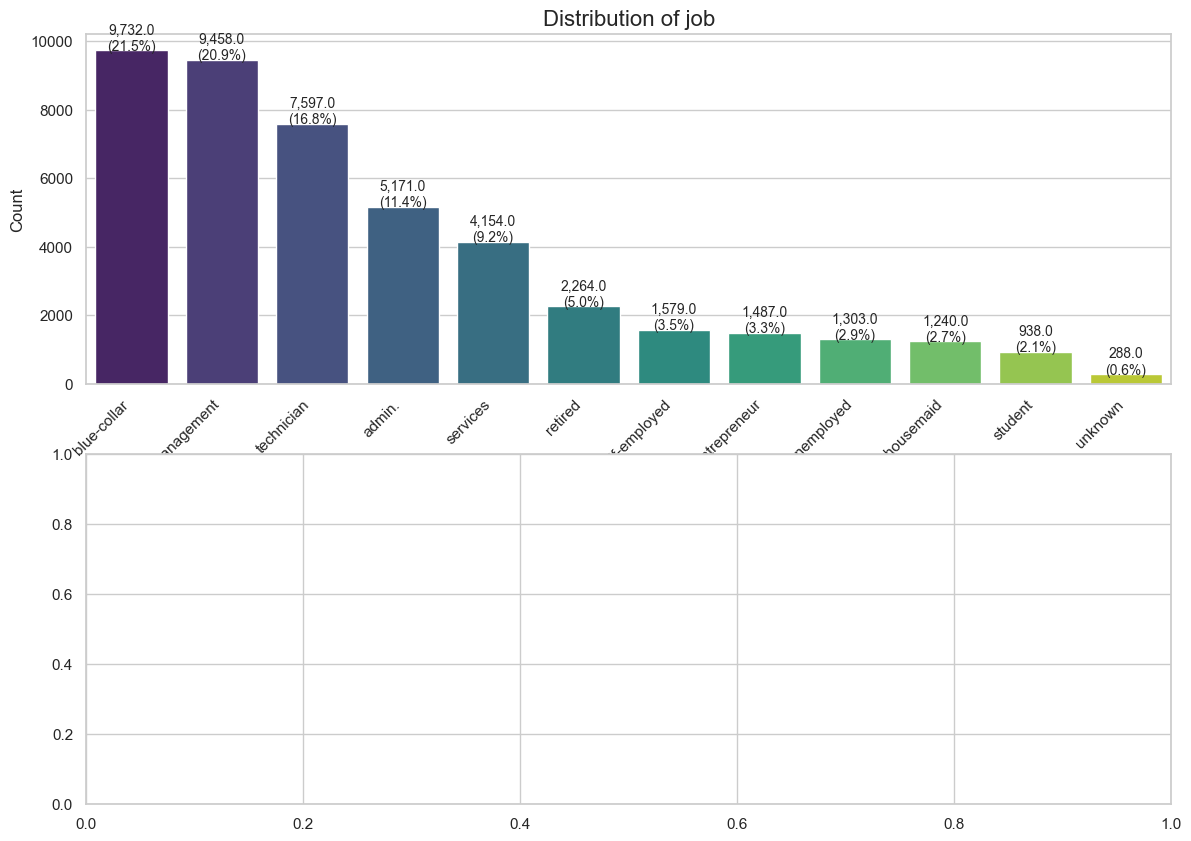

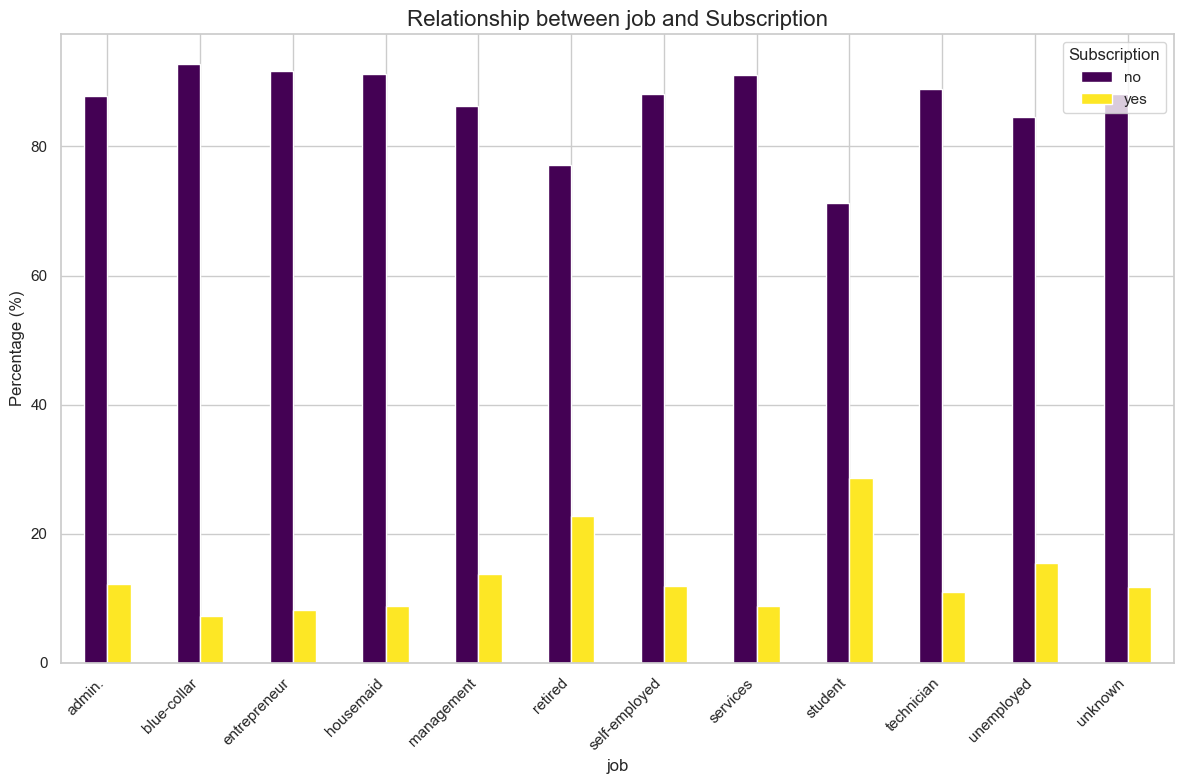

C:\Users\shubh\AppData\Local\Temp\ipykernel_26360\326607097.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dist.index, y=dist.values, palette='viridis')


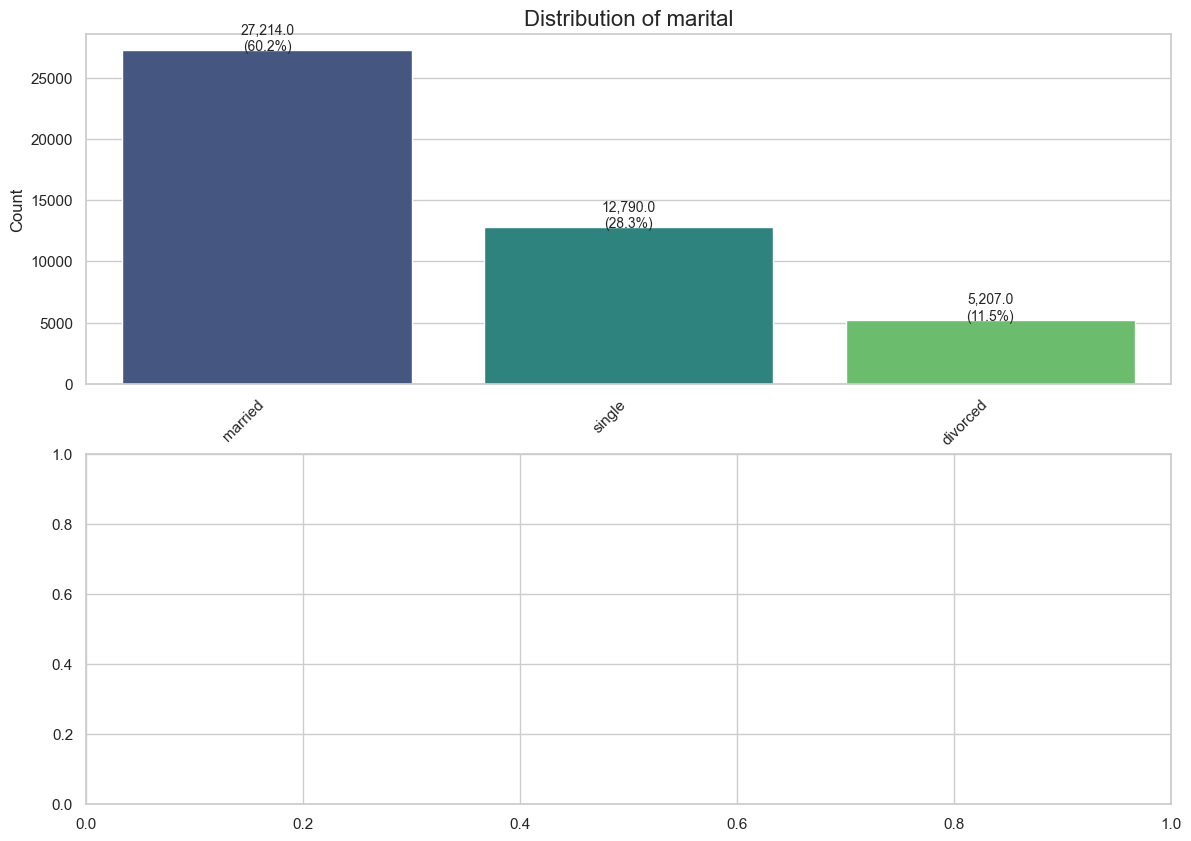

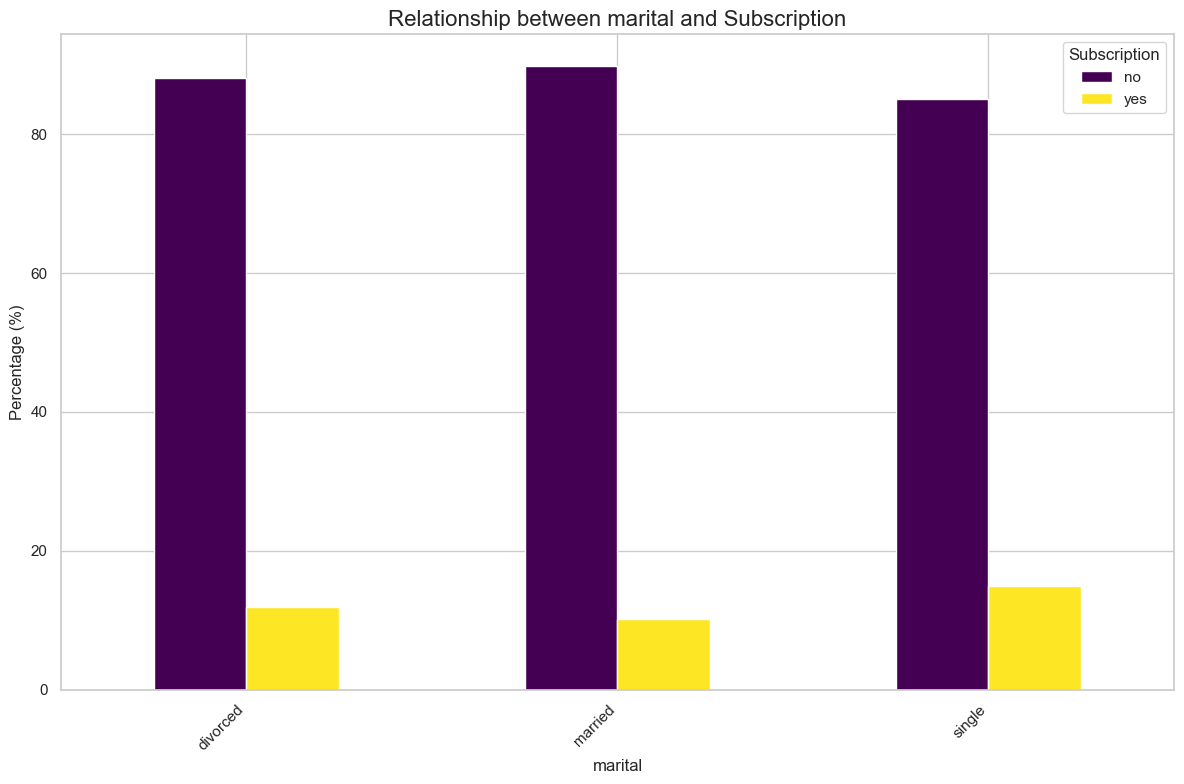

C:\Users\shubh\AppData\Local\Temp\ipykernel_26360\326607097.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dist.index, y=dist.values, palette='viridis')


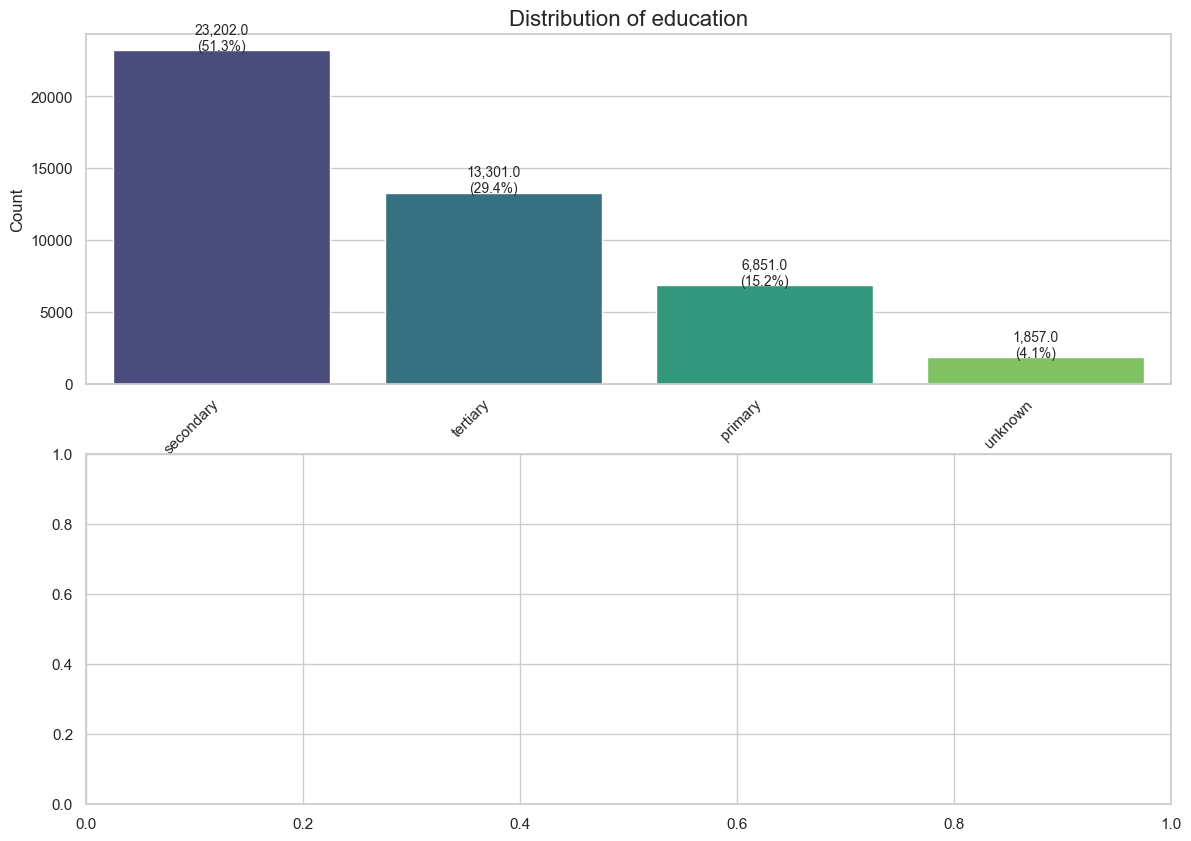

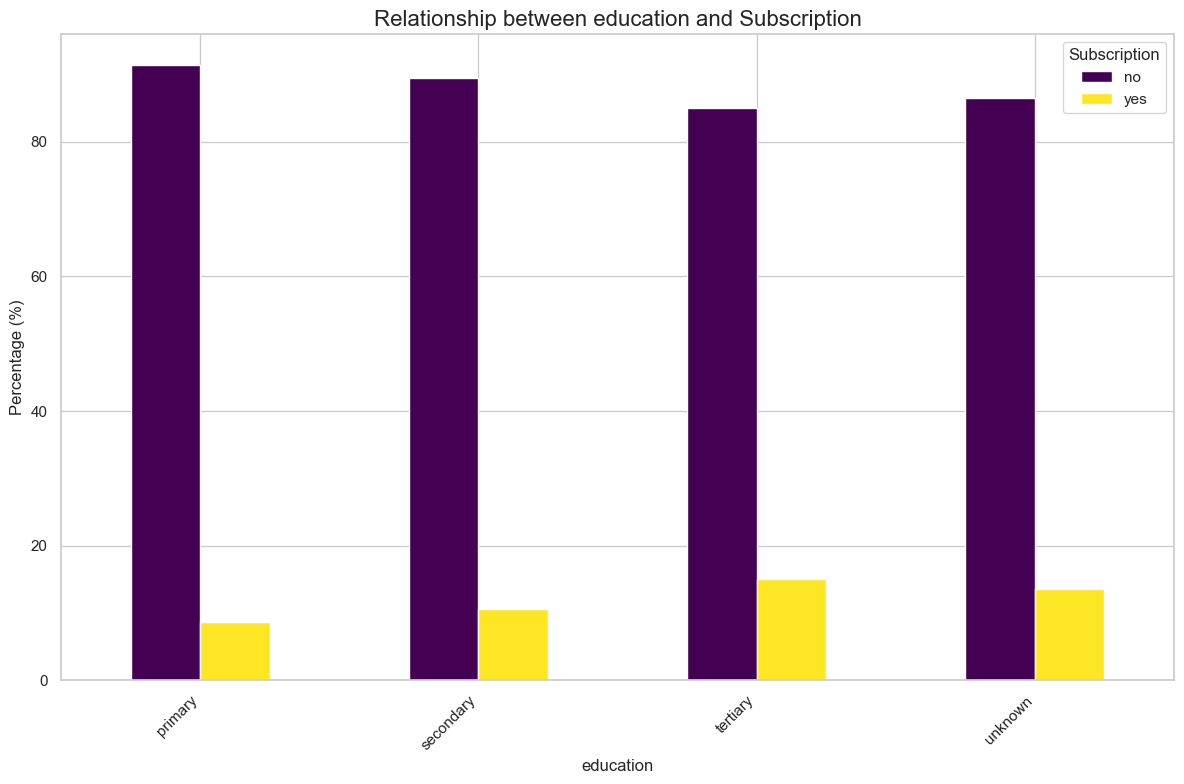

C:\Users\shubh\AppData\Local\Temp\ipykernel_26360\326607097.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dist.index, y=dist.values, palette='viridis')


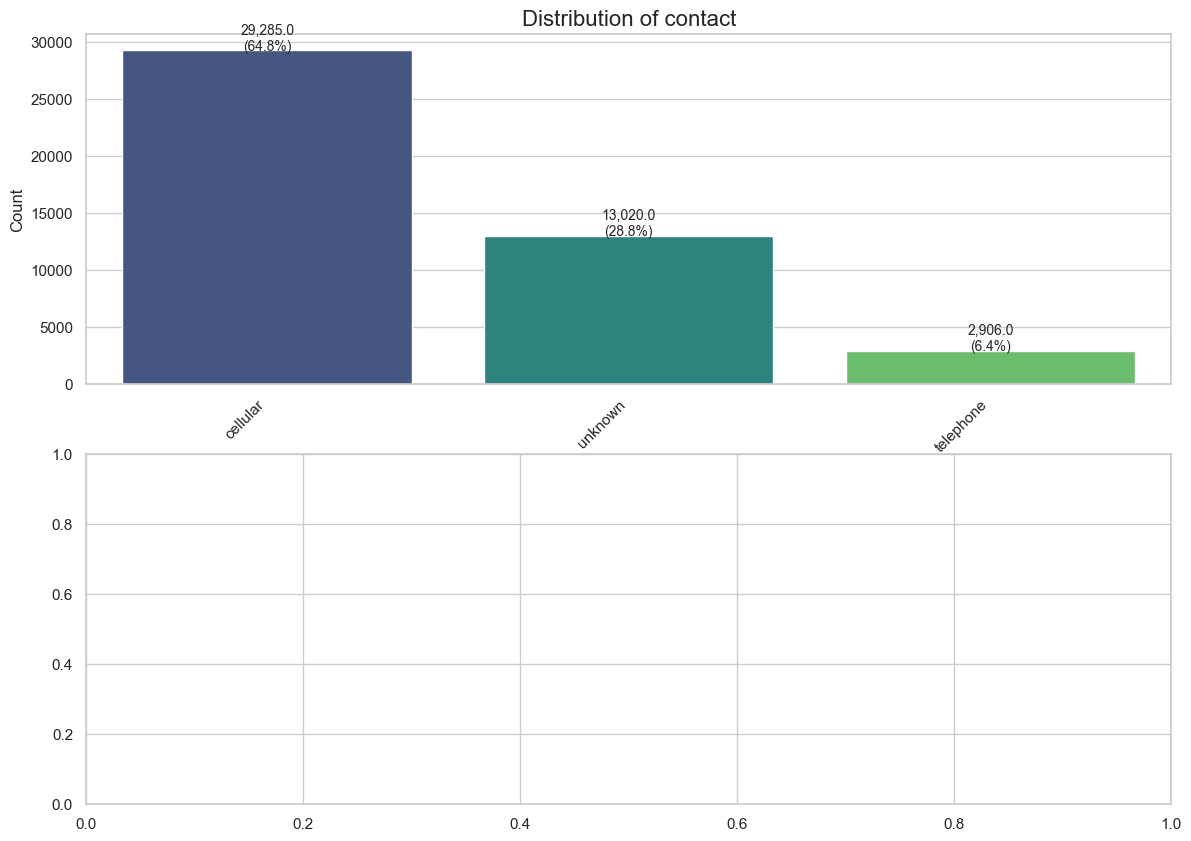

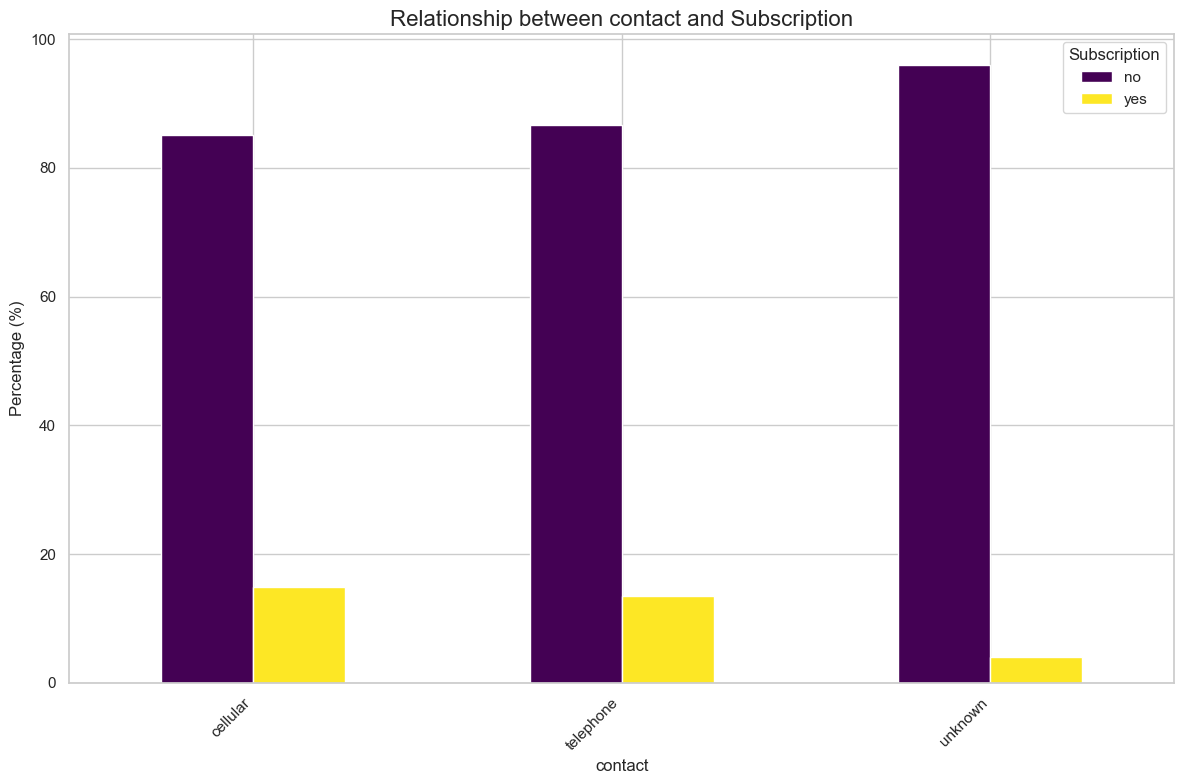

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical features: {numerical_cols}")

# Visualize numerical features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

## 6. Target Variable Analysis

Let's analyze the target variable 'y' which represents whether a client subscribed to a term deposit.

In [ ]:
# Distribution of the target variable
target_counts = df['y'].value_counts()
target_percentage = df['y'].value_counts(normalize=True) * 100

# Create a DataFrame for better display
target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percentage
})

print("Distribution of the target variable 'y' (subscription to term deposit):")
print(target_summary)

# Visualize the distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='y', data=df, palette='viridis')

# Add count and percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = target_percentage.values[i]
    ax.text(p.get_x() + p.get_width()/2., height + 500, 
            f'{height:,}\n({percentage:.1f}%)',
            ha="center", fontsize=12)

plt.title('Target Variable Distribution', fontsize=16)
plt.xlabel('Subscription to Term Deposit', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## 7. Feature Correlations

Let's analyze correlations between numerical features.

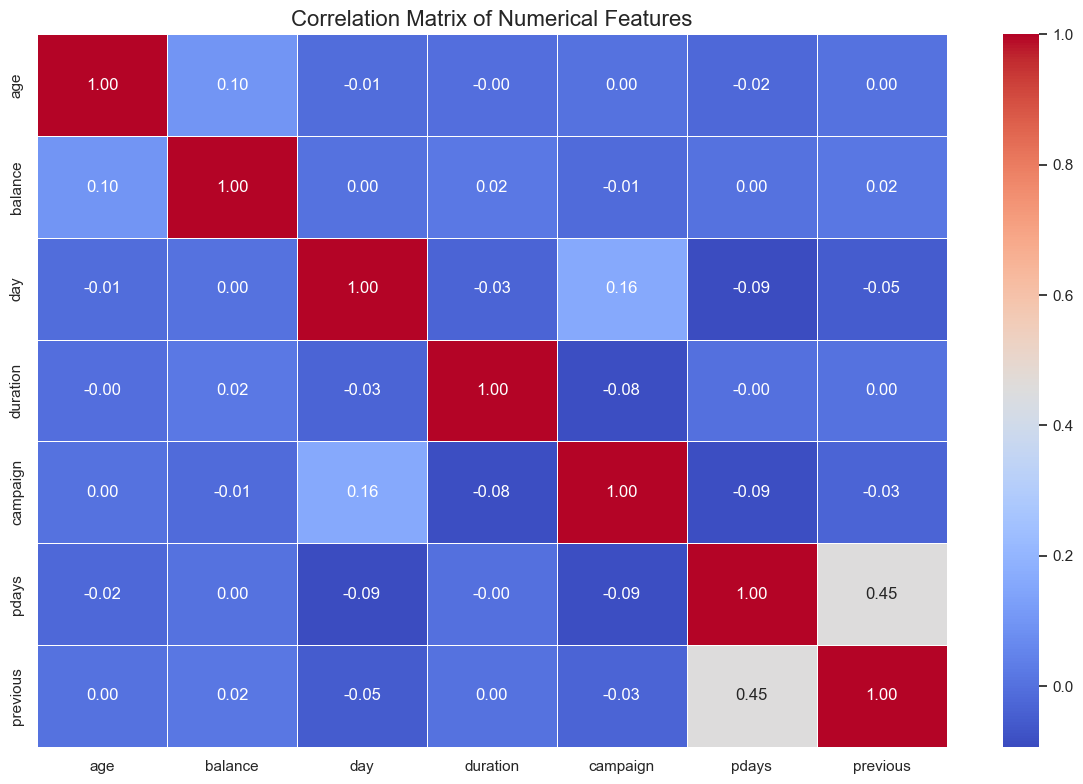

In [14]:
# Calculate correlation matrix for numerical features
correlation = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# 8. Predictive Modeling: Term Deposit Subscription

In this section, we'll build machine learning models to predict whether a client will subscribe to a term deposit using our 16 features.

In [ ]:
# Import libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Prepare data for modeling
X = df.drop('y', axis=1)
y = (df['y'] == 'yes').astype(int)  # Convert to binary format (1 for 'yes', 0 for 'no')

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Target distribution in training set: \n{y_train.value_counts(normalize=True) * 100}")
print(f"Target distribution in testing set: \n{y_test.value_counts(normalize=True) * 100}")

Columns only in the main dataset:
{'balance', 'day'}

Columns only in the additional dataset:
{'emp.var.rate', 'euribor3m', 'cons.price.idx', 'nr.employed', 'day_of_week', 'cons.conf.idx'}

Number of common columns: 15
Common columns:
['age', 'campaign', 'contact', 'default', 'duration', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'pdays', 'poutcome', 'previous', 'y']


In [ ]:
# Create preprocessing pipeline
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and train models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    # Train model
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Store model and results
    results[name] = {
        'pipeline': pipeline,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

## 9. Feature Importance Analysis

In [ ]:
# Get the best model based on ROC AUC
best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
best_pipeline = results[best_model_name]['pipeline']

print(f"Best model: {best_model_name}")

# Extract the model from the pipeline
best_model = best_pipeline.named_steps['model']

# Extract feature names after preprocessing
if hasattr(best_model, 'feature_importances_'):
    # Get column transformer
    preprocessor = best_pipeline.named_steps['preprocessor']
    
    # Get feature names from the preprocessor
    ohe = preprocessor.named_transformers_['cat']
    cat_features = ohe.get_feature_names_out(categorical_cols)
    feature_names = np.append(numerical_cols, cat_features)
    
    # Get feature importances
    importances = best_model.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Get top 20 features or all if less than 20
    top_n = min(20, len(feature_names))
    top_indices = indices[:top_n]
    top_importances = importances[top_indices]
    top_feature_names = feature_names[top_indices]
    
    # Visualize feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_importances)), top_importances, align='center')
    plt.yticks(range(len(top_importances)), [str(name) for name in top_feature_names])
    plt.title('Top Feature Importances', fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    plt.tight_layout()
    plt.show()

## 10. Save the Best Model

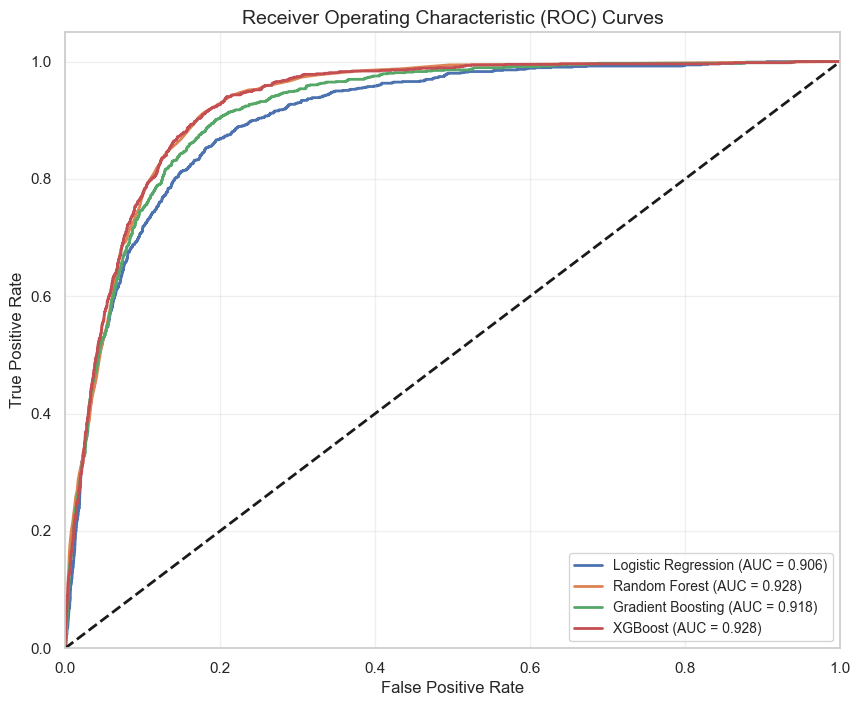

In [ ]:
# Save the best model pipeline using joblib
import joblib

# Save the model
model_filename = 'bank_model.joblib'
joblib.dump(best_pipeline, model_filename)
print(f"Model saved to {model_filename}")

## 11. Example Prediction

Let's test the model with a sample input using only our 16 features.

In [ ]:
# Create a sample input with our 16 features
sample_input = {
    'age': 42,
    'job': 'management',
    'marital': 'married',
    'education': 'tertiary',
    'default': 'no',
    'balance': 2000,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 15,
    'month': 'may',
    'duration': 300,
    'campaign': 2,
    'pdays': -1,
    'previous': 0,
    'poutcome': 'unknown'
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Make prediction
prediction_proba = best_pipeline.predict_proba(sample_df)[0, 1]
prediction = best_pipeline.predict(sample_df)[0]

print(f"\nPrediction for sample input:")
print(f"Probability of subscribing: {prediction_proba:.4f}")
print(f"Will subscribe: {'Yes' if prediction == 1 else 'No'}")